In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('stud.csv')


In [5]:
data.dtypes
data.shape

(1000, 8)

In [ ]:
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
data.duplicated().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
data.nunique().sum()
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
print(data['gender'].unique())
print(data['race_ethnicity'].unique())
print(data['parental_level_of_education'].unique())
print(data['lunch'].unique())
print(data['test_preparation_course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [18]:
numeric_features = [feature for feature in data.columns if data[feature].dtype != '0']
categorical_features = [feature for feature in data.columns if data[feature].dtype == '0']

In [49]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['Average_score'] = data['total_score']/3
data = data.drop('Auerage_score',axis = 1)


In [50]:
data.head(5)
# data.shape

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
data[data['math_score'] == 100]['gender'].count() # number of student who score full marks in math = 7
data[data['reading_score'] == 100]['gender'].count()  # number of student who score full marks in reading = 17
data[data['writing_score'] == 100]['gender'].count()   # number of student who score full marks in writing = 14

14

In [ ]:
data[data['math_score'] <= 20]['gender'].count() # number of student who score below 20 marks in math = 4
data[data['reading_score'] <= 20]['gender'].count()  # number of student who score below 20 marks in reading = 1
data[data['writing_score'] <= 20]['gender'].count()   # number of student who score below 20 marks in writing = 3

4

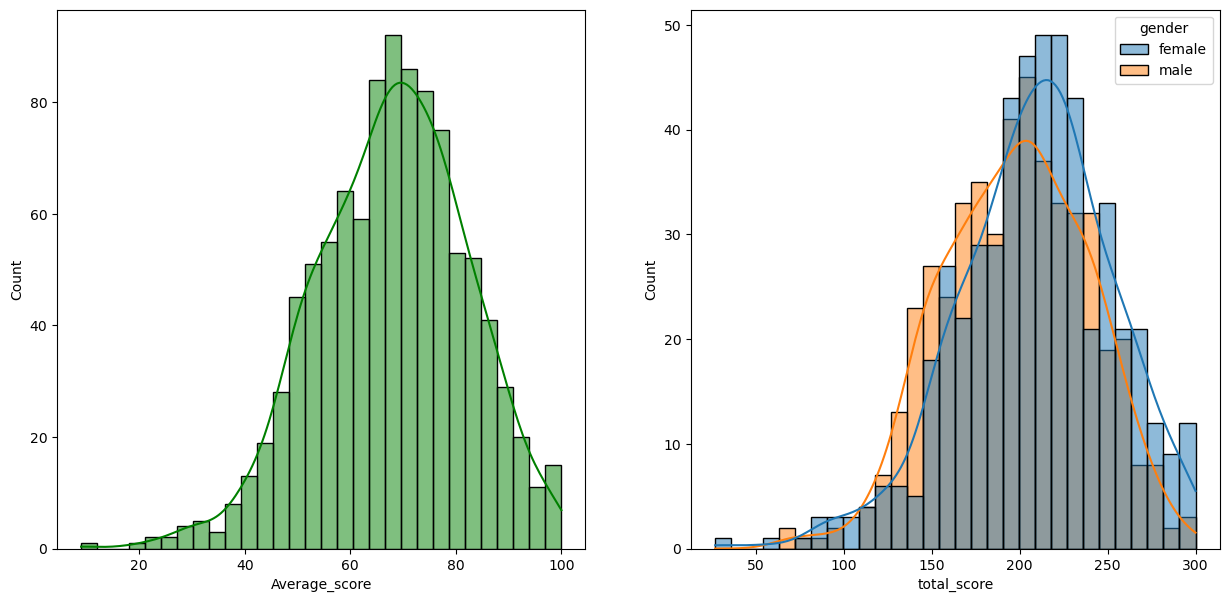

In [58]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=data,x= 'Average_score',bins = 30,kde = True,color= 'g')
plt.subplot(122)
sns.histplot(data=data,x = 'total_score',bins = 30,kde = True,hue='gender')
plt.show()

<Axes: xlabel='Average_score', ylabel='Count'>

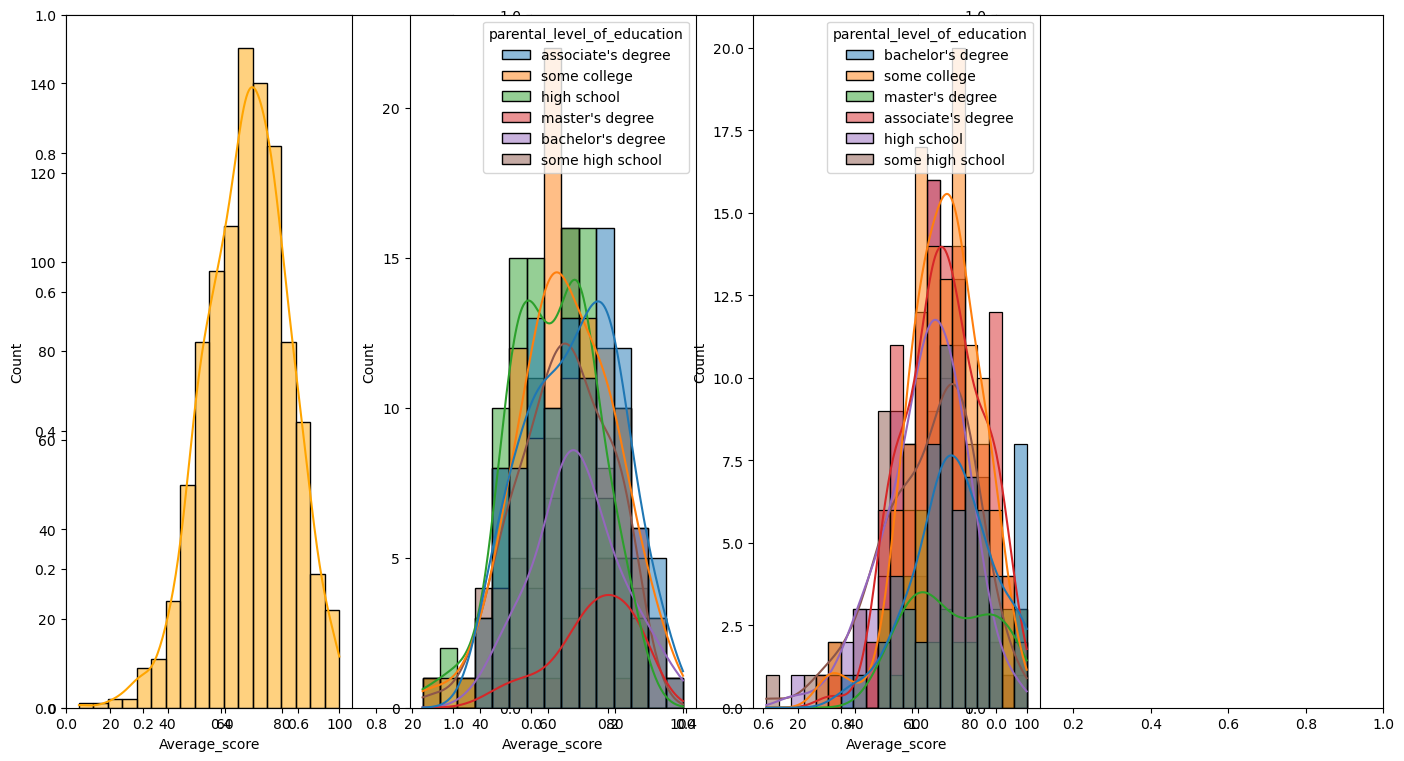

In [73]:
plt.subplots(1,3,figsize = (17,9))
plt.subplot(141)
sns.histplot(data= data,x='Average_score',bins = 18,kde = True,color='orange')
plt.subplot(142)
sns.histplot(data = data[data.gender == 'male'],x='Average_score',kde = True,hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data = data[data.gender == 'female'],x='Average_score',kde = True,hue = 'parental_level_of_education')


(-1.25, 1.25, -1.25, 1.25)

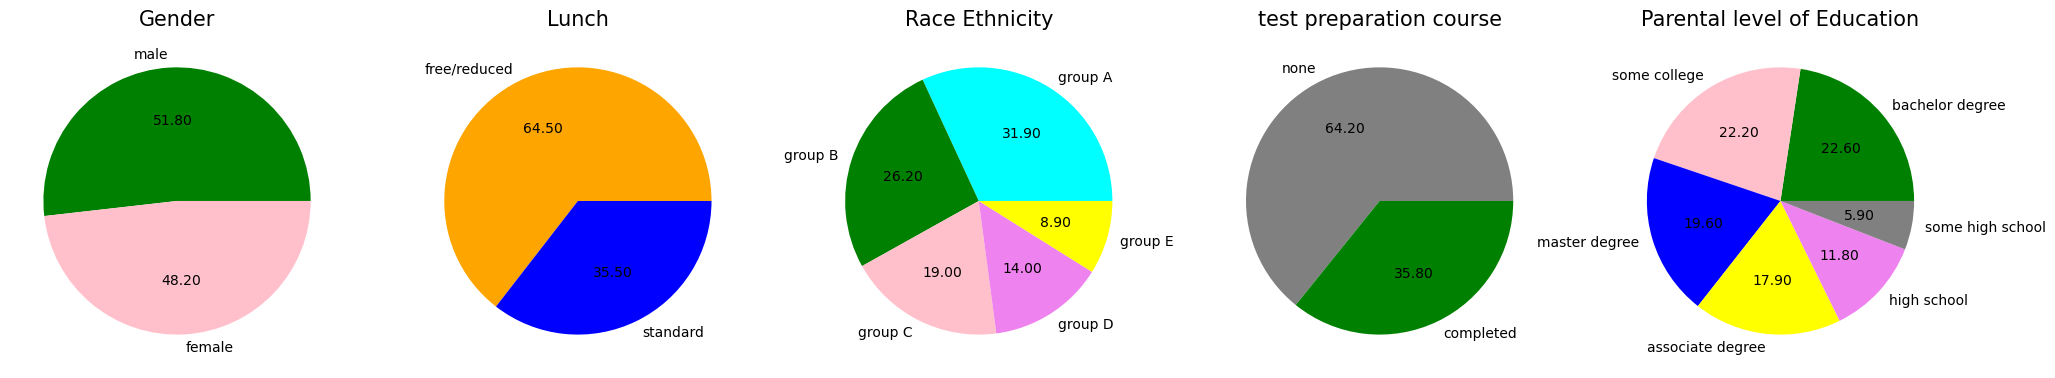

In [74]:
plt.rcParams['figure.figsize']=(25,12)

plt.subplot(151)
size=data['gender'].value_counts()
labels=['male','female']
colors=['green','pink']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Gender',fontsize=15)
plt.axis('off')

plt.subplot(152)
size=data['lunch'].value_counts()
labels=['free/reduced','standard']
colors=['orange','blue']

plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Lunch',fontsize=15)
plt.axis('off')

plt.subplot(153)
size=data['race_ethnicity'].value_counts()
labels=['group A','group B','group C','group D','group E']
colors=['cyan','green','pink','violet','yellow']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Race Ethnicity',fontsize=15)
plt.axis('off')


plt.subplot(154)
size=data['test_preparation_course'].value_counts()
labels=['none','completed']
colors=['grey','green']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('test preparation course',fontsize=15)
plt.axis('off')


plt.subplot(155)
size=data['parental_level_of_education'].value_counts()
labels=['bachelor degree','some college','master degree','associate degree','high school','some high school']
colors=['green','pink','blue','yellow','violet','grey']
plt.pie(size,colors=colors,labels=labels,autopct='%.2f')
plt.title('Parental level of Education',fontsize=15)
plt.axis('off')